<a href="https://colab.research.google.com/github/changsin/MIU_ML/blob/main/notebooks/04.logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression
Logistic regression is a parametric method to classify data. In binary logistic regression, data are divided into two categories based on a logistic regression function.





## Model
The general form of the model is:

$$ h_\theta(x) = g(\theta^Tx) $$

- h: hypothesis
- $\theta$: parameters
- g: logistic function


For logistic function, sigmoid function is often used because it gives the values between 0 and 1 for all possible values. If you set a threshold value between 0 and 1, you can achieve binary classification. The method is very similar to linear regression and this is why it is called "logistic regression."

$$ g(z) = \frac{1}{1+e^{-z}} $$

- g: logistic regression function
- z: $\theta^Tx$
- e: Euler number

Using the sigmoid as the logistic regression, we can set 0.5 as the threshold value and predict the y value. For instance, $ \hat y = 1$ if $ h(x) \ge 0.5 $ and $ \hat y = 0$ if $ h(x) < 0.5 $


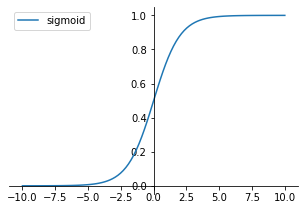

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
  # TODO: to implement
  pass

def plot_centered_graph(x, y, pos, label):
  fig = plt.figure(figsize=(30,20))
  ax = fig.add_subplot(5, 5, pos)
  ax.plot(x, y, label=label)
  ax.spines['left'].set_position('center')
  ax.spines['bottom'].set_position(('data', 0))
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.legend()

X = np.linspace(-10, 10, 100)
H = sigmoid(X)

plot_centered_graph(X, H, 1, 'sigmoid')

In [25]:
-np.log(0.001)

6.907755278982137

If correctly implemented, the plotting of the sigmoid function should look like this:

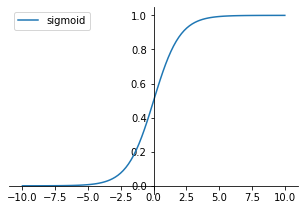

## Cost Function
cannot use the same cost function that we use for linear regression because the Logistic Function will cause the output to be wavy, causing many local optima. In other words, it will not be a convex function.
Instead, we want to use the following cost function which is actually a combination of two cases: when y = 1 and y = 0.


$$ J(\theta) = \frac{1}{m}\sum\limits_{t=1}^{m}(Cost(h_\theta(x^{(i)}), y^{(i)}) $$

$$ Cost(h_\theta(x^{(i)}), y^{(i)}) = -\frac{1}{m}[\sum\limits_{i=1}^m y^{(i)}log (h_\theta(x^{(i)})) + (1 - y^{(i)})log(1-h_\theta(x^{(i)}))]$$

The goal of the logistic regression is to find $\theta$ that minimizes the cost function $ J(\theta) $

## Gradient Descent
The gradient descent formula is the same as that of linear regression, except that h (hypothesis) is sigmoid. 

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

# Sample dataset:
 [sklearn diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

## X column attributes:
1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension (“coastline approximation” - 1)

(mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

## y target value:
  1: malignant (212) 0: benign (357)

In [26]:
!git clone https://github.com/changsin/MIU_ML

Cloning into 'MIU_ML'...
remote: Enumerating objects: 1003, done.
remote: Counting objects: 100% (1003/1003), done.
remote: Compressing objects: 100% (907/907), done.
remote: Total 1003 (delta 24), reused 967 (delta 8), pack-reused 0
Receiving objects: 100% (1003/1003), 231.12 MiB | 37.41 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [ ]:
from sklearn import datasets

X, y = datasets.load_breast_cancer(return_X_y=True)

X.shape

(569, 30)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(X, y):
  positives = X[y == 1]
  negatives = X[y == 0]

  fig, ax = plt.subplots()
  ax.plot(positives[:, 0], positives[:, 1], marker='o', linestyle='', ms=12, label='+')
  ax.plot(negatives[:, 0], negatives[:, 1], marker='o', linestyle='', ms=12, label='-')

  plt.legend()

  return ax

## Plot tumor size vs. malignant

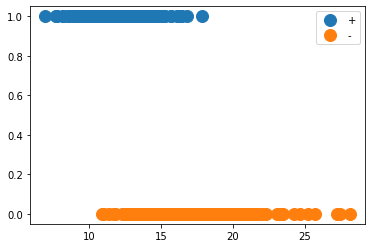

In [ ]:
data = np.stack((X[:, 0], y), axis=1)

plot_data(data, y)

## Plot tumor size and texture

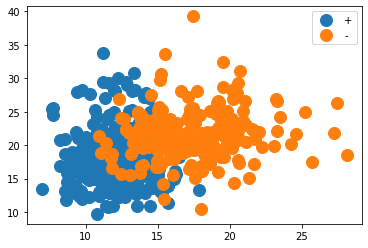

In [ ]:
data = np.stack((X[:, 0], X[:, 1]), axis=1)

ax = plot_data(data, y)

In [ ]:

from sklearn.linear_model import LogisticRegression

model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(X[:, :2], y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

errors = np.sum(y != model_logistic_regression.predict(X[:, :2]))
total = y.shape[0]
accurate = total - errors
print("Accuracy: {:.02f} ({}/{})".format((total - errors)/total, accurate, total))

Accuracy: 0.89 (507/569)
